In [1]:
import context
import numpy as np
from matplotlib import pyplot as plt

******************************
context imported. Front of path:
/Users/tschmidt/repos/numeric_students
back of path: /Users/tschmidt/.ipython
******************************

through /Users/tschmidt/repos/numeric_students/numeric_notebooks/lab4/context.py


## 1) Problem Tableau

Heun's Method <br/>

$$
\begin{array}{|c|c|cc|c|} \hline
i & a_i & {b_{ij}} &   & c_i \\ \hline
1 & 0 & 0 &  0 & \frac{1}{4}\\
2 & \frac{2}{3} & \frac{2}{3} & 0 & \frac{3}{4}\\ \hline
{j=} & & 1 & 2 & \\ \hline
\end{array}
$$

Explicit Fourth-Order Runge-Kutta Method <br/>

$$
\begin{array}{|c|c|cccc|c|} \hline
i & a_i &{b_{ij}} &  &  & & c_i \\ \hline
1 & 0 & 0 & 0 & 0 & 0 & \frac{1}{6}\\
2 & \frac{1}{2} & \frac{1}{2} & 0 & 0 & 0 & \frac{1}{3}\\ 
3 & \frac{1}{2} & 0 & \frac{1}{2} & 0 & 0 & \frac{1}{3}\\
4 & 1 & 0 & 0 & 1 & 0 & \frac{1}{6}\\\hline
{j=} & & 1 & 2 &  3 & 4 & \\ \hline
\end{array}
$$

## 2) Problem RK4

In [1]:
from numlabs.lab4.lab4_functions import initinter41,eulerinter41,midpointinter41,\
                                        rk4ODEinter41

def rK4(y_initial,t_beg,t_end,dt,c1,c2,c3):
    initialVals={'yinitial': y_initial,'t_beg':t_beg,'t_end':t_end,'dt':dt,'c1':c1,'c2':c2,'c3':c3}
    coeff = initinter41(initialVals)
    timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    nsteps=len(timeVec)
    ye=[]
    ym=[]
    yrk=[]
    y=coeff.yinitial
    ye.append(coeff.yinitial)
    ym.append(coeff.yinitial)
    yrk.append(coeff.yinitial)
    for i in np.arange(1,nsteps):
        ynew=eulerinter41(coeff,y,timeVec[i-1])
        ye.append(ynew)
        ynew=midpointinter41(coeff,y,timeVec[i-1])
        ym.append(ynew)
        ynew=rk4ODEinter41(coeff,y,timeVec[i-1])
        yrk.append(ynew)
        y=ynew
    analytic=timeVec + np.exp(-timeVec)
    theFig=plt.figure(0)
    theFig.clf()
    theAx=theFig.add_subplot(111)
    l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
    theAx.set_xlabel('time (seconds)')
    l2=theAx.plot(timeVec,ye,'r-',label='euler')
    l3=theAx.plot(timeVec,ym,'g-',label='midpoint')
    l4=theAx.plot(timeVec,yrk,'m-',label='rk4')
    theAx.legend(loc='best')
    theAx.set_title('Various Numeric Methods');
    
    ye_err=[]
    ym_err=[]
    yrk_err=[]
    theFig2=plt.figure(1)
    theFig2.clf()
    error_e = np.absolute(ye-analytic)
    error_m = np.absolute(ym-analytic)
    error_rk = np.absolute(yrk-analytic)
    newAx=theFig2.add_subplot(111)
    l2=newAx.plot(timeVec,error_e,'r-',label='euler')
    l3=newAx.plot(timeVec,error_m,'g-',label='midpoint')
    l4=newAx.plot(timeVec,error_rk,'m-',label='rk4')
    newAx.set_xlabel('time (seconds)')
    newAx.legend(loc='best')
    newAx.set_title("Methods' Corresponding Error");

ModuleNotFoundError: No module named 'numlabs'

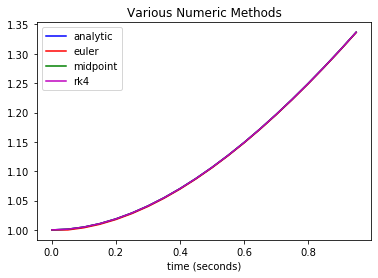

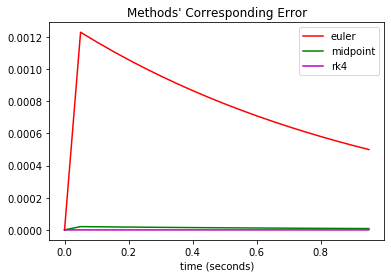

In [3]:
#Default case

y_initial = 1
t_beg = 0
t_end = 1
dt = 0.05
c1 = -1
c2 = 1
c3 = 1

rK4(y_initial,t_beg,t_end,dt,c1,c2,c3)

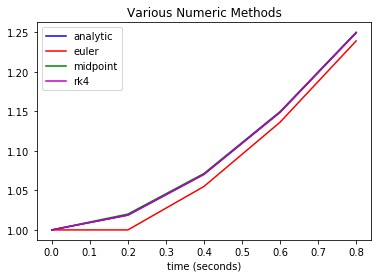

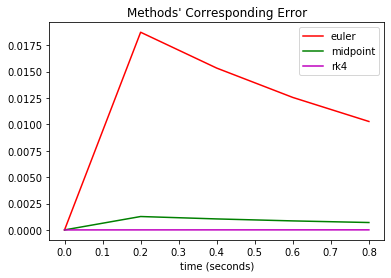

In [4]:
#dt = 0.2 s

t_beg = 0
t_end = 1
dt = 0.2

rK4(y_initial,t_beg,t_end,dt,c1,c2,c3)

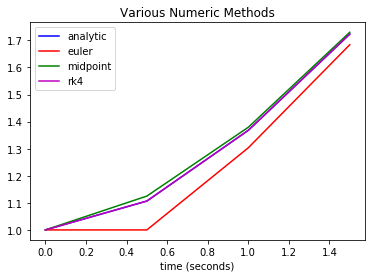

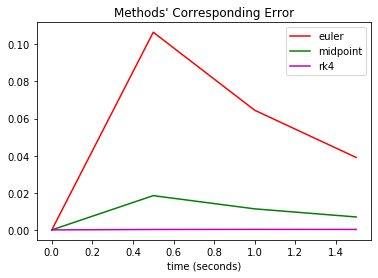

In [5]:
#dt = 0.5 s

t_beg = 0
t_end = 2
dt = 0.5

rK4(y_initial,t_beg,t_end,dt,c1,c2,c3)

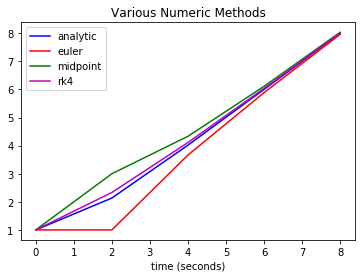

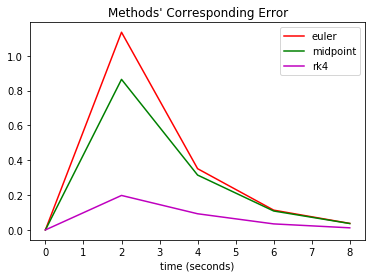

In [6]:
#dt = 2 s

t_beg = 0
t_end = 10
dt = 2

rK4(y_initial,t_beg,t_end,dt,c1,c2,c3)

1. It seems that overall the fourth-order Runge-Kutta method performs the best, especially taking into account the change in the timestep.
2. I will use bias to determine my error with each method <abs(numeric-actual)>. It seems most error occurs at the beginning of each run. After enough time has passed the various methods seem to all converge to what is expected in the system. This sort of pattern is consistent with each different timestep that I tested. The Euler method seems to have considerable error regardless of the timestep while the error of the midpoint and fourth-order Runge-Kutta methods seem to require larger timesteps to be noticeable.

    As mentioned in question (1), it seems that the fourth-order Runge-Kutta method is the least affected by a change in timestep, while the midpoint method takes second place.

## 3) Problem Embedded

In [7]:
from numlabs.lab4.lab4_functions import initinter41,rk4ODEinter41,rkckODEinter41

def embed(y_initial,t_beg,t_end,dt,c1,c2,c3):
    initialVals={'yinitial': y_initial,'t_beg': t_beg,'t_end': t_end,'dt': dt,'c1': c1,'c2': c2,'c3': c3}
    coeff = initinter41(initialVals)

    timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    nsteps=len(timeVec)
    ye=[]
    ym=[]
    yrk=[]
    yrkck=[]
    y1=coeff.yinitial
    y2=coeff.yinitial
    yrk.append(coeff.yinitial)
    yrkck.append(coeff.yinitial)
    for i in np.arange(1,nsteps):
        ynew=rk4ODEinter41(coeff,y1,timeVec[i-1])
        yrk.append(ynew)
        y1=ynew 
        ynew=rkckODEinter41(coeff,y2,timeVec[i-1])
        yrkck.append(ynew)
        y2=ynew 
    analytic=timeVec + np.exp(-timeVec)
    theFig=plt.figure(0)
    theFig.clf()
    theAx=theFig.add_subplot(111)
    l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
    theAx.set_xlabel('time (seconds)')
    l2=theAx.plot(timeVec,yrkck,'g-',label='rkck')
    l3=theAx.plot(timeVec,yrk,'m-',label='rk')
    theAx.legend(loc='best')
    theAx.set_title('Comparing Fourth and Fifth Order RK');
    
    theFig2=plt.figure(1)
    theFig2.clf()
    error_yrkck = np.absolute(yrkck-analytic)
    error_rk = np.absolute(yrk-analytic)
    newAx=theFig2.add_subplot(111)
    l2=newAx.plot(timeVec,error_yrkck,'g-',label='rkck')
    l3=newAx.plot(timeVec,error_rk,'m-',label='rk')
    newAx.set_xlabel('time (seconds)')
    newAx.legend(loc='best')
    newAx.set_title("Methods' Corresponding Error");

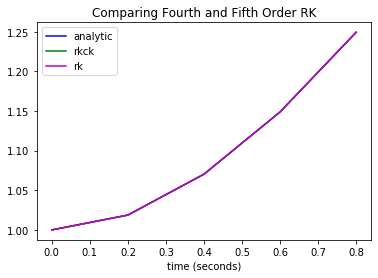

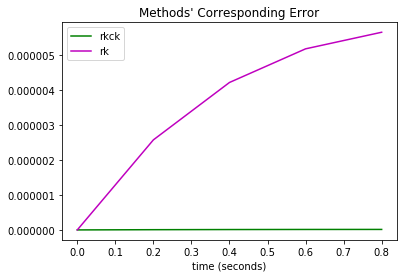

In [8]:
#Default case

y_initial = 1
t_beg = 0
t_end = 1
dt = 0.2
c1 = -1
c2 = 1
c3 = 1

embed(y_initial,t_beg,t_end,dt,c1,c2,c3)

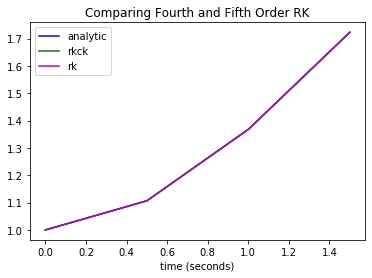

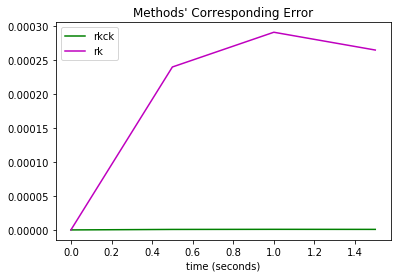

In [13]:
#dt = 0.5

dt = 0.5
t_beg = 0
t_end = 2

embed(y_initial,t_beg,t_end,dt,c1,c2,c3)

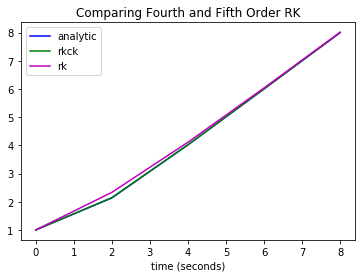

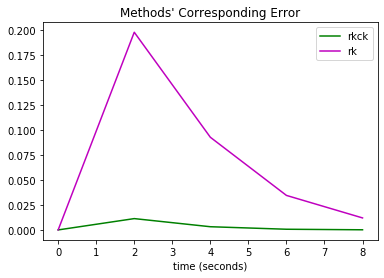

In [12]:
#dt = 2

dt = 2
t_beg = 0
t_end = 10

embed(y_initial,t_beg,t_end,dt,c1,c2,c3)

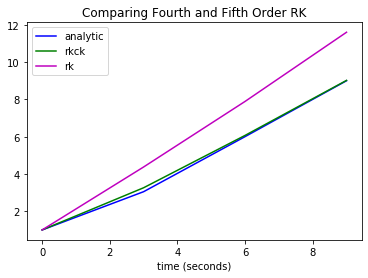

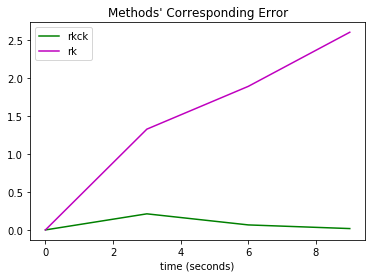

In [16]:
#dt = 3

dt = 3
t_beg = 0
t_end = 10

embed(y_initial,t_beg,t_end,dt,c1,c2,c3)

Conclusion: Using the same strategies defined in problem 2, I have determined that the fifth-order Runge-Kutta is consistently more accurate than the fourth-order. All of the error plots seem to indicate this.

## 4) Problem Coding A

In "Assignment4_Coding.ipynb"